#          *Data Analyst jobs visualization*

![image.png](attachment:image.png)

# About Dataset

This dataset was created by picklesueat and contains more than 2000 job listing for data analyst positions, with features such as:

* Salary Estimate
* Location
* Company Rating
* Job Description
  and more.


# Import Libraries and dataset

In [ ]:
# !pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MySkill Bootcamp MiniCase/Colab Notebooks/Session 13/DataAnalyst.csv/DataAnalyst.csv')

# Lets explore the data

In [ ]:
data.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1


**Data includes job title , salary estimation , job description , rating ,company name , location and many more ...**

# Data cleaning

### Remove the unnamed column

In [ ]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)

### Check for missing values

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [ ]:
missing_values_table(data)

Your selected dataframe has 15 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Company Name,1,0.0


In [ ]:
data['Easy Apply'].value_counts()

-1      2173
True      80
Name: Easy Apply, dtype: int64

In [ ]:
data['Competitors'].value_counts()

-1                                                                 1732
Robert Half, Insight Global                                          14
Adecco, Manpower                                                     14
Artech Information Systems, Mindlance, Tech Mahindra                 10
Google, Microsoft, Samsung Electronics                               10
                                                                   ... 
Carr Riggs & Ingram, Cherry Bekaert, LBMC                             1
Transnational Foods, One Source Distributors                          1
GE                                                                    1
Fiserv, First Data, Jack Henry & Associates                           1
Centura Health, HealthONE, Denver Health and Hospital Authority       1
Name: Competitors, Length: 291, dtype: int64

In [ ]:
data['Rating'].value_counts()[:5]

-1.0    272
 3.9    140
 3.6    135
 3.7    132
 5.0    131
Name: Rating, dtype: int64

As some of the columns contains -1 or '-1.0' or '-1' etc . We need to clean this(This is kind of null values)

Replace -1 or -1.0 or '-1' to NaN

In [ ]:
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

In [ ]:
missing_values_table(data)

Your selected dataframe has 15 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
Easy Apply,2173,96.4
Competitors,1732,76.9
Founded,660,29.3
Industry,353,15.7
Sector,353,15.7
Rating,272,12.1
Headquarters,172,7.6
Size,163,7.2
Type of ownership,163,7.2
Revenue,163,7.2


Now you can see there are lots of missing values in the dataset. 'Easy Apply' and 'Competitors' has maximum number of missing values (> 50%)

Most companies has null values in easy apply because they are not hiring .

In [ ]:
data['Company Name'],_=data['Company Name'].str.split('\n', 1).str

<ipython-input-17-d79831fb4d01>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data['Company Name'],_=data['Company Name'].str.split('\n', 1).str
<ipython-input-17-d79831fb4d01>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['Company Name'],_=data['Company Name'].str.split('\n', 1).str


In [ ]:
data['Job Title'],data['Department']=data['Job Title'].str.split(',', 1).str

<ipython-input-18-2485459de680>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data['Job Title'],data['Department']=data['Job Title'].str.split(',', 1).str
<ipython-input-18-2485459de680>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['Job Title'],data['Department']=data['Job Title'].str.split(',', 1).str


In [ ]:
data['Salary Estimate'],_=data['Salary Estimate'].str.split('(', 1).str

<ipython-input-19-db56586e1189>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data['Salary Estimate'],_=data['Salary Estimate'].str.split('(', 1).str
<ipython-input-19-db56586e1189>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['Salary Estimate'],_=data['Salary Estimate'].str.split('(', 1).str


#### Split salary into two columns min salary and max salary.

In [ ]:
data['Min_Salary'],data['Max_Salary']=data['Salary Estimate'].str.split('-').str
data['Min_Salary']=data['Min_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
data['Max_Salary']=data['Max_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

<ipython-input-20-459ba913a5e5>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['Min_Salary'],data['Max_Salary']=data['Salary Estimate'].str.split('-').str


In [ ]:
data.drop(['Salary Estimate'],axis=1,inplace=True)

# Current openings

In [ ]:
data['Easy Apply']=data['Easy Apply'].fillna(False).astype('bool')

In [ ]:
df_easy_apply=data[data['Easy Apply']==True]
df=df_easy_apply.groupby('Company Name')['Easy Apply'].count().reset_index()
company_opening_df=df.sort_values('Easy Apply',ascending=False).head(10)

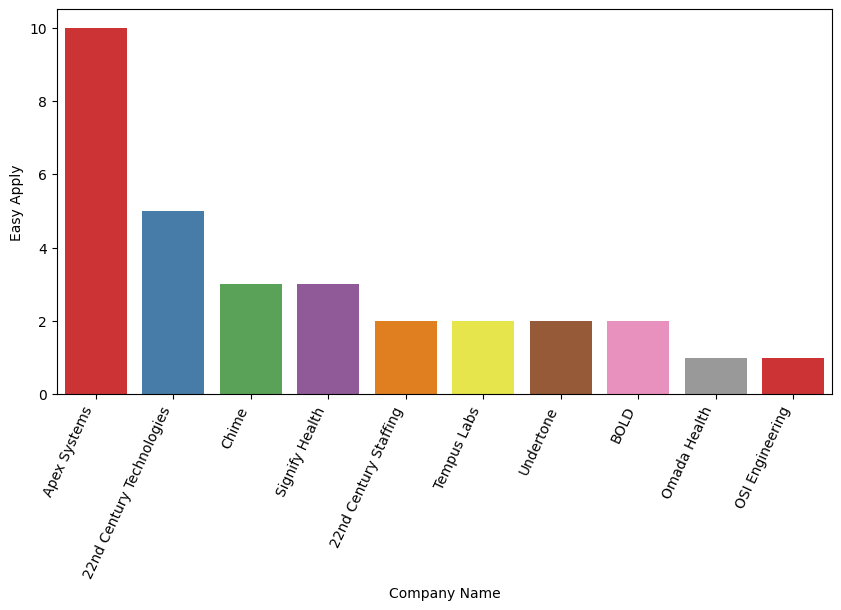

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=company_opening_df,
    x='Company Name',
    y='Easy Apply',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=65,
    horizontalalignment='right',
    fontweight='light',


)

**These are the top 10 companies hiring for Data analyst roles**

# Salary Distribution of Data Analyst

<ipython-input-25-db046f29fe70>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_analyst['Min_Salary'], color="b", ax=axes[0])
<ipython-input-25-db046f29fe70>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_analyst['Max_Salary'], color="r",ax=axes[1])


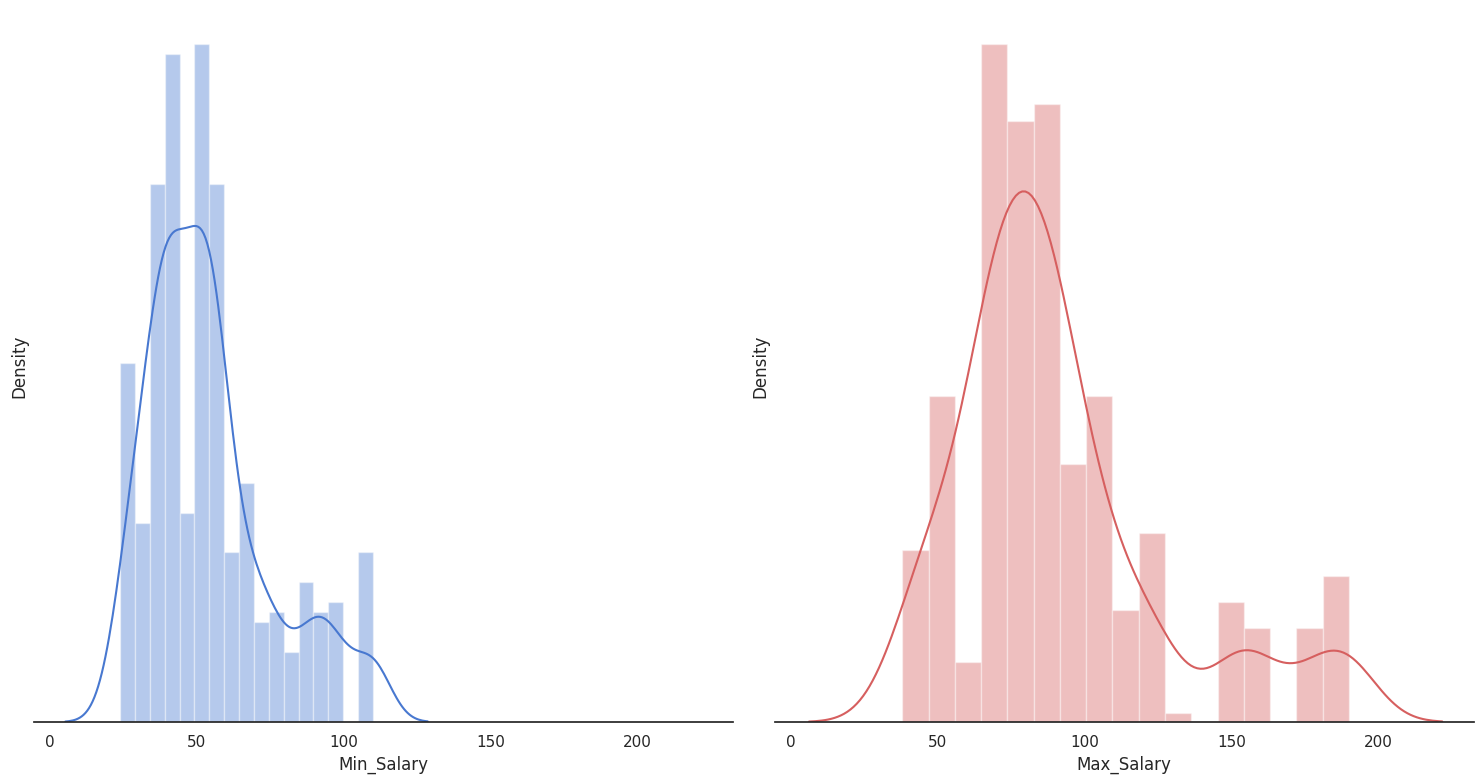

In [ ]:
data_analyst = data[data['Job Title']=='Data Analyst']


sns.set(style="white", palette="muted", color_codes=True)


f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.despine(left=True)

#Plot a histogram and kernel density estimate

sns.distplot(data_analyst['Min_Salary'], color="b", ax=axes[0])

sns.distplot(data_analyst['Max_Salary'], color="r",ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()

# Top 20 cities with their minimum and maximum salaries

In [ ]:
df=data.groupby('Location')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False).head(20)

In [ ]:

fig = go.Figure()

fig.add_trace(go.Bar(x=df.index,y=df['Min_Salary'],name='Minimum salary'))
fig.add_trace(go.Bar(x=df.index,y=df['Max_Salary'],name='Maximum Salary'))

fig.update_layout(title='Top 20 cities with their minimum and maximum salaries',barmode='stack')

fig.show()

# Top 20 Roles with their minimum and maximum salaries

In [ ]:
df=data.groupby('Job Title')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False).head(20)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df.index,y=df['Min_Salary'],name='Minimum salary'))
fig.add_trace(go.Bar(x=df.index,y=df['Max_Salary'],name='Maximum Salary'))

fig.update_layout(title='Top 20 Roles with their minimum and maximum salaries',barmode='stack')

fig.show()

# Size of Employees Vs No of Companies

In [ ]:
df=data['Size'].value_counts()

In [ ]:
df=pd.DataFrame(df)
df['employee_size']=df.index

In [ ]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [ ]:
df=df.rename(columns={"Size": "No_of_companies"})

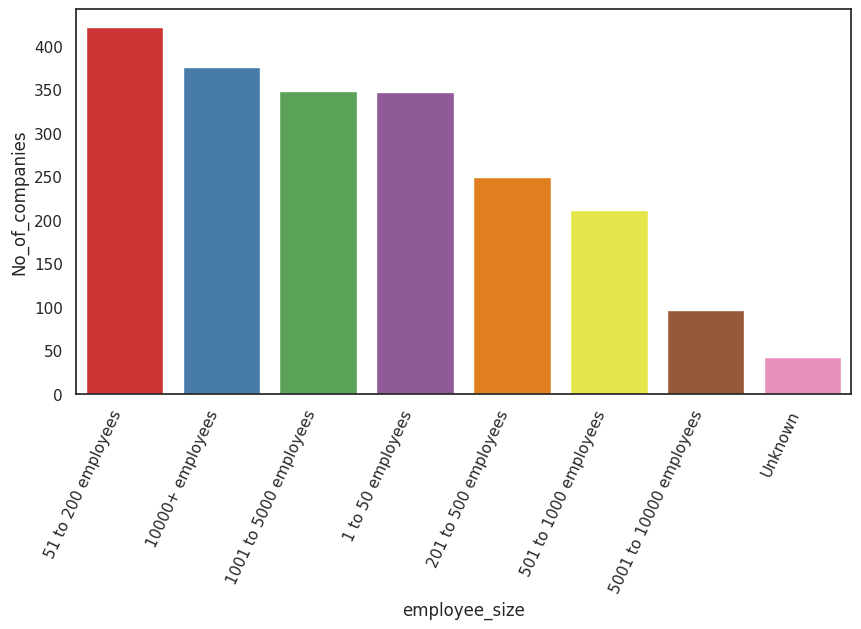

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='employee_size',
    y='No_of_companies',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=65,
    horizontalalignment='right',
    fontweight='light',

)

**maximum companies having size 1-200 or 5000**

# Revenue of different sectors

In [ ]:
def filter_revenue(x):
    revenue=0
    if(x== 'Unknown / Non-Applicable' or type(x)==float):
        revenue=0
    elif(('million' in x) and ('billion' not in x)):
        maxRev = x.replace('(USD)','').replace("million",'').replace('$','').strip().split('to')
        if('Less than' in maxRev[0]):
            revenue = float(maxRev[0].replace('Less than','').strip())
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])
    elif(('billion'in x)):
        maxRev = x.replace('(USD)','').replace("billion",'').replace('$','').strip().split('to')
        if('+' in maxRev[0]):
            revenue = float(maxRev[0].replace('+','').strip())*1000
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])*1000
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])*1000
    return revenue


In [ ]:
data['Max_revenue']=data['Revenue'].apply(lambda x: filter_revenue(x))

In [ ]:
df=data.groupby('Sector')[['Max_revenue']].mean().sort_values(['Max_revenue'],ascending=False).head(20)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,Sector,Max_revenue
0,Insurance,5465.196078
1,Mining & Metals,5000.000000
2,Aerospace & Defense,4884.090909
3,Telecommunications,4778.181818
4,Finance,4653.881657
5,Retail,4447.394737
6,Manufacturing,4382.625000
7,Media,3837.880952
8,Transportation & Logistics,3080.000000
9,Biotech & Pharmaceuticals,2835.636364


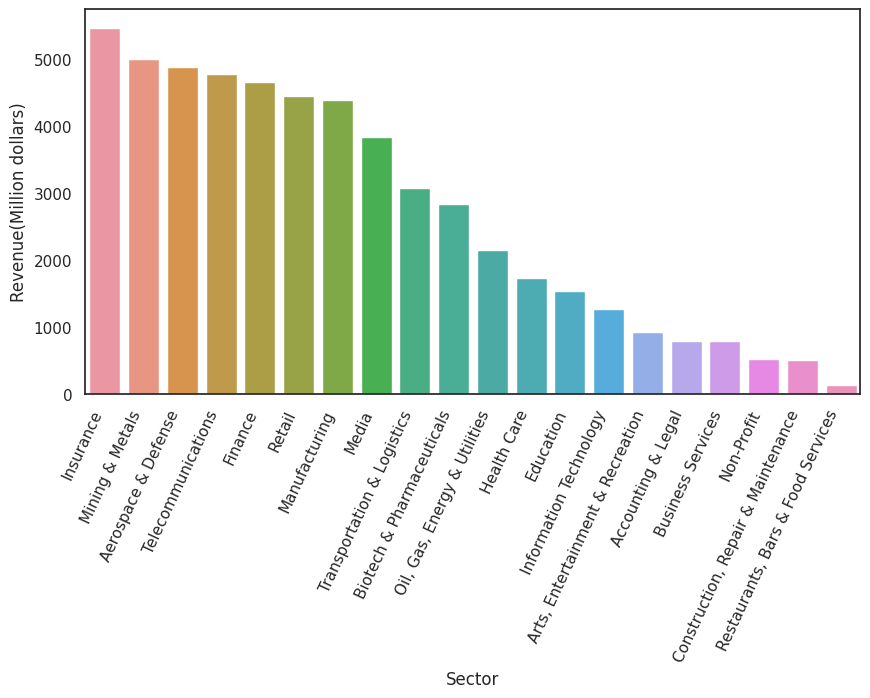

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Sector',
    y='Max_revenue'
)
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=65,
    horizontalalignment='right',
    fontweight='light',

)
chart.axes.yaxis.label.set_text("Revenue(Million dollars)")


As you can see from the graph **highest revenue** is from **Art,Entertainment and recreation**

# Revenue of different Industries

In [ ]:
df=data.groupby('Industry')[['Max_revenue']].mean().sort_values(['Max_revenue'],ascending=False).head(20)

In [ ]:
df.reset_index(inplace=True)

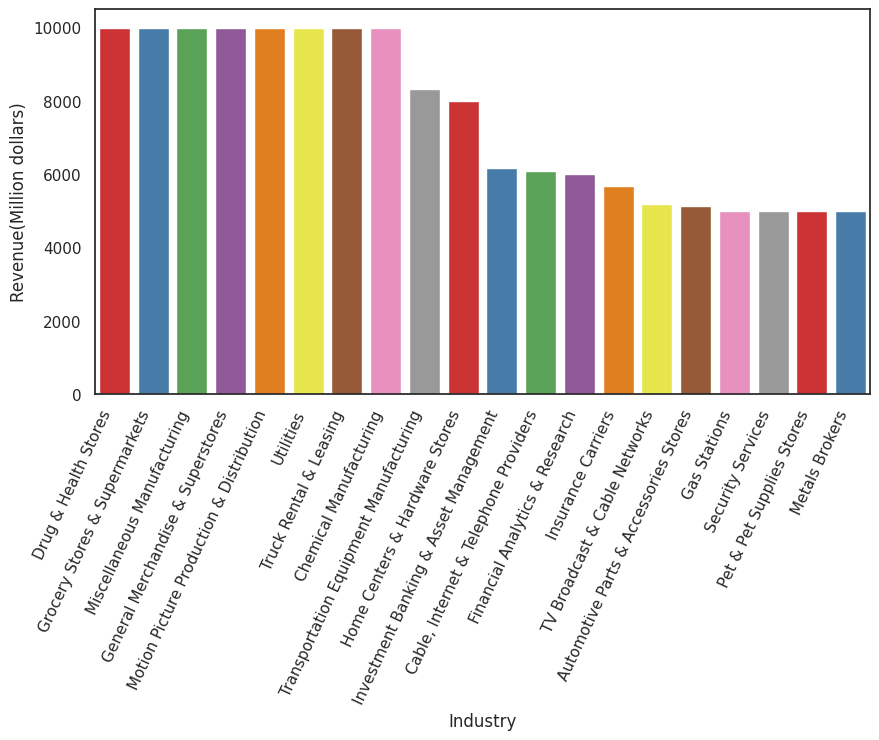

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Industry',
    y='Max_revenue',
    palette='Set1'
)
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=65,
    horizontalalignment='right',
    fontweight='light',

)
chart.axes.yaxis.label.set_text("Revenue(Million dollars)")

# Word Cloud of job Title

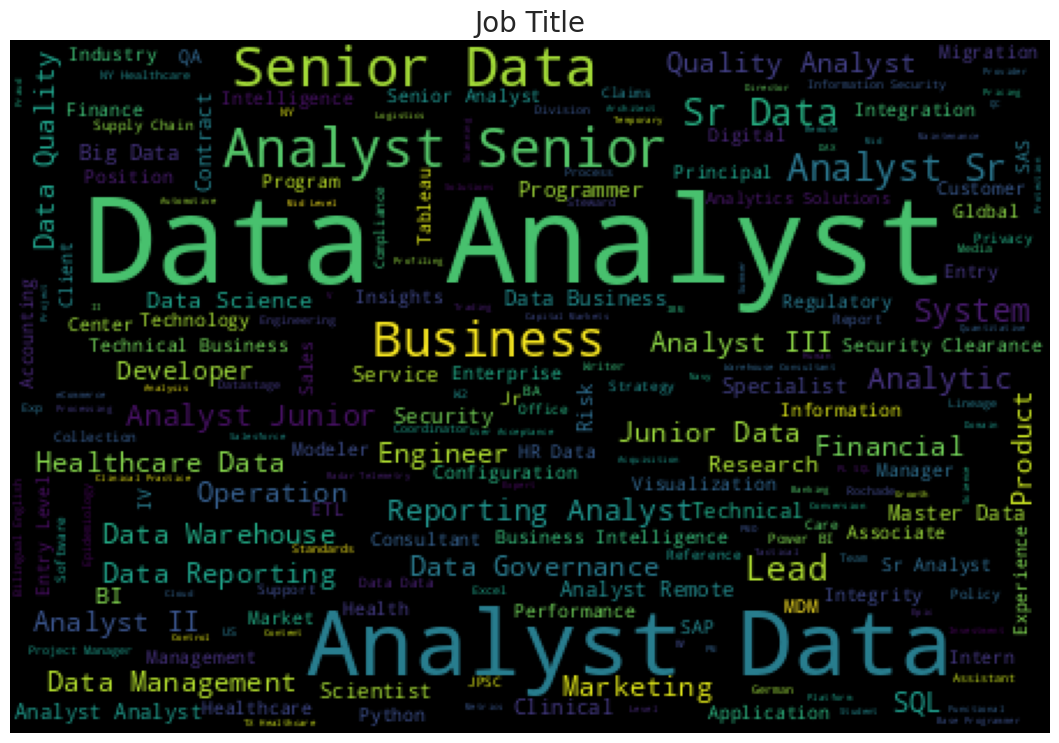

In [ ]:
job_title=data['Job Title'][~pd.isnull(data['Job Title'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(job_title))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(data['Job Title'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

# Ratings

In [ ]:
count=data.groupby('Rating')['Company Name'].count()

In [ ]:
df=pd.DataFrame(count).rename(columns={'Company Name': 'Count'}).reset_index()

In [ ]:
df=df.sort_values('Rating',ascending=False).head(20)

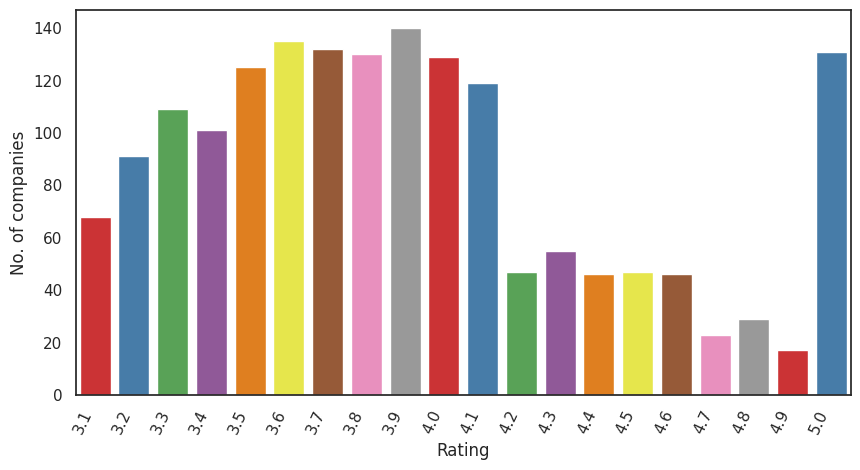

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Rating',
    y='Count',
    palette='Set1'
)
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=65,
    horizontalalignment='right',
    fontweight='light',

)
chart.axes.yaxis.label.set_text("No. of companies")

# Industries with their Average minimum and maximum salaries

In [ ]:
df=data.groupby('Industry')[['Min_Salary','Max_Salary']].mean().rename(columns={'Min_Salary':'Avg_min_salary','Max_Salary':'Avg_max_salary'})

In [ ]:
df=df.reset_index()

In [ ]:
df=df.sort_values(['Avg_max_salary','Avg_max_salary'],ascending=False)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df.Industry,y=df['Avg_min_salary'],name='Average Minimum salary'))
fig.add_trace(go.Bar(x=df.Industry,y=df['Avg_max_salary'],name='Average Maximum Salary'))

fig.update_layout(title='Industries with their Average minimum and maximum salaries',barmode='stack')

fig.show()

# Jobs with Openings

In [ ]:
df=pd.DataFrame(data[data['Easy Apply']==True]['Job Title'].value_counts()).rename(columns={'Job Title':'No_of_openings'})

In [ ]:
df=df.reset_index().rename(columns={'index':'Job Title'})

In [ ]:
df=df.head(10)

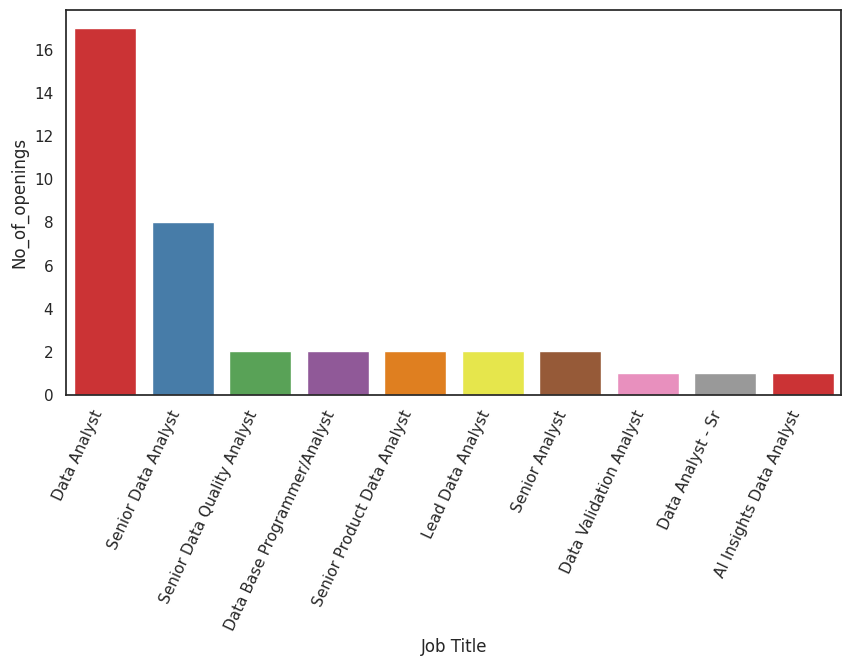

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Job Title',
    y='No_of_openings',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=65,
    horizontalalignment='right',
    fontweight='light',

)


# If you like my work do UPVOTE